# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>Last Edit:</b> 9/27/2016

Section 0: Preparing data <br>
Section 1: Seasonal?

##  Section 0: Preparing data

In [1]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

Loading required package: fitdistrplus
Loading required package: MASS
Loading required package: survival
Loading required package: caTools
Loading required package: repr
Loading required package: IRdisplay


In [2]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [3]:
data = read.csv(file = "data/LAKEWOOD_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [4]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 5

Check number of years in the data set.

In [5]:
data$YEAR[nrow(data)]-firstYear

[1] 51

In [88]:
table(data$MONTH)


 1  2  3  4  5  6  7  8  9 10 11 12 
52 52 52 52 52 52 52 52 52 52 52 52 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [156]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((data$YEAR[1] + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

## Section 1: Seasonal?

In [90]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

In [91]:
cp=239
cpYear = 1983

In [92]:
smooth = runmean(data$Max.PRCP., 120)
smoothTS = ts(smooth, start=firstYear, freq=12)

In [93]:
data["box"] = as.numeric(data$YEAR>=cpYear)

In [94]:
indicator = c(rep(0,cp),rep(1,(nrow(data)-cp)))

In [95]:
meansBox = as.data.frame(cbind(smoothTS,indicator))

In [96]:
meansBoxSea = as.data.frame(cbind(smoothTS, rep(c(1,2,3,4,5,6,7,8,9,10,11,12),length(smoothTS)/12),indicator))

In [97]:
names(meansBoxSea) = c("precipitation","month","indicator")

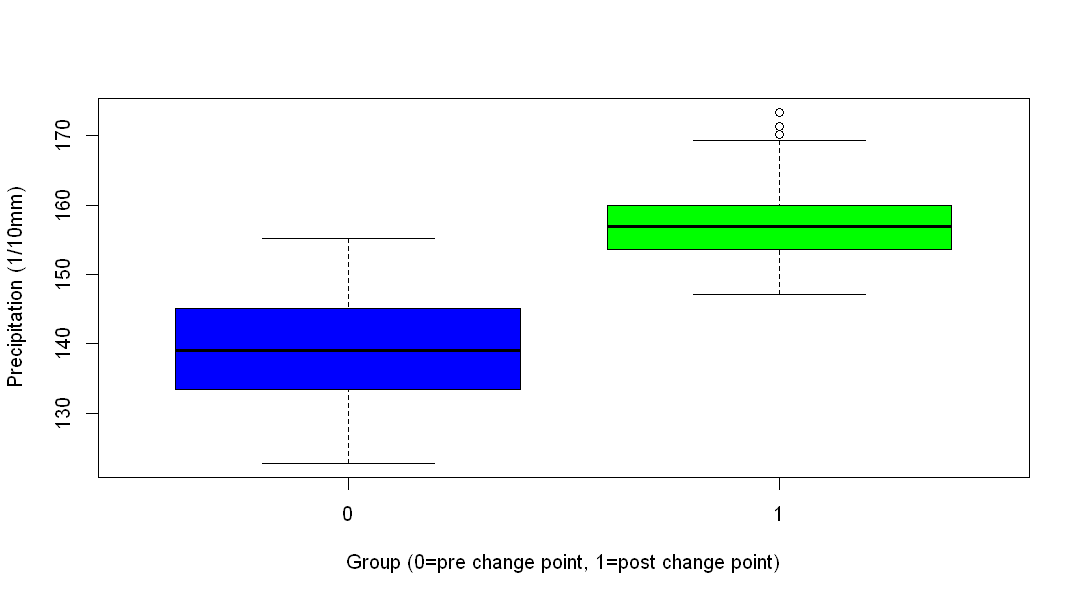

In [98]:
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

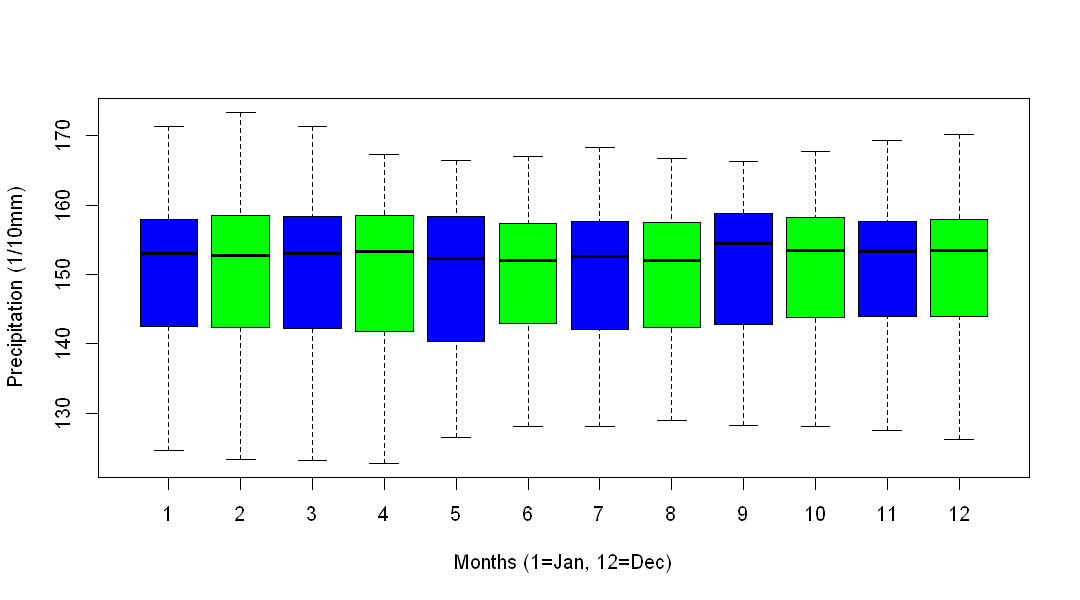

In [99]:
boxplot(meansBoxSea$precipitation ~ meansBoxSea$month, xlab = "Months (1=Jan, 12=Dec)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

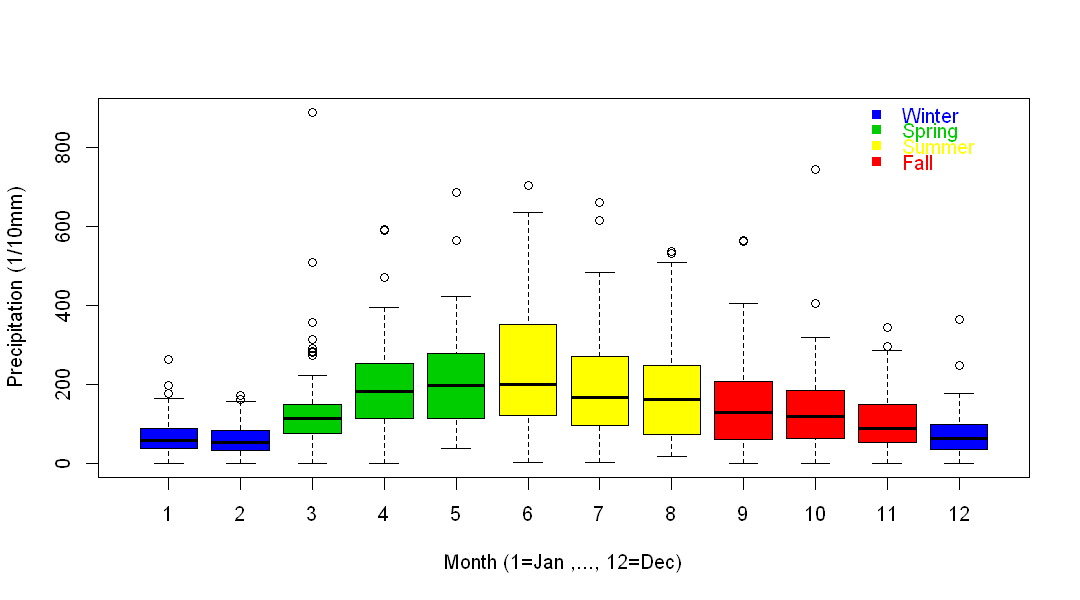

In [100]:
boxplot(data$Max.PRCP. ~ meansBoxSea$month, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,3,3,3,7,7,7,2,2,2,4), ylab = "Precipitation (1/10mm)")
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)

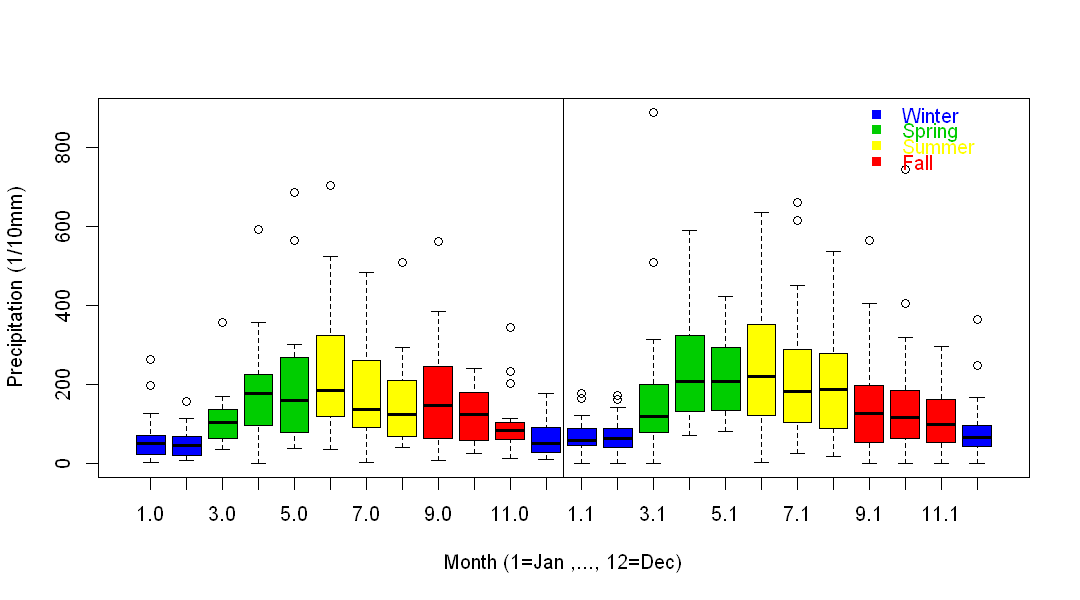

In [101]:
boxplot(data$Max.PRCP. ~ meansBoxSea$month + meansBoxSea$indicator, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,3,3,3,7,7,7,2,2,2,4), ylab = "Precipitation (1/10mm)"
        #xaxt="n"
       )
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)
abline(v=12.5)

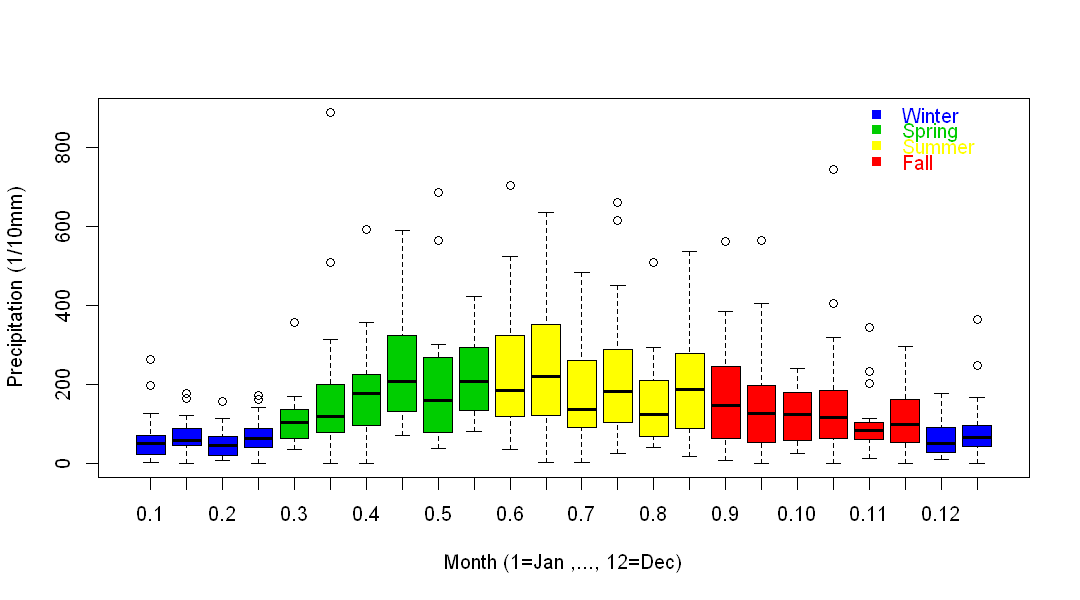

In [102]:
boxplot(data$Max.PRCP. ~  meansBoxSea$indicator+ meansBoxSea$month, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,4,4,3,3,3,3,3,3,7,7,7,7,7,7,2,2,2,2,2,2,4,4), ylab = "Precipitation (1/10mm)")
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
       text.col = c(4,3,7,2), pt.bg = c(4,3,7,2))

Warning message:
: Removed 5 rows containing non-finite values (stat_boxplot).

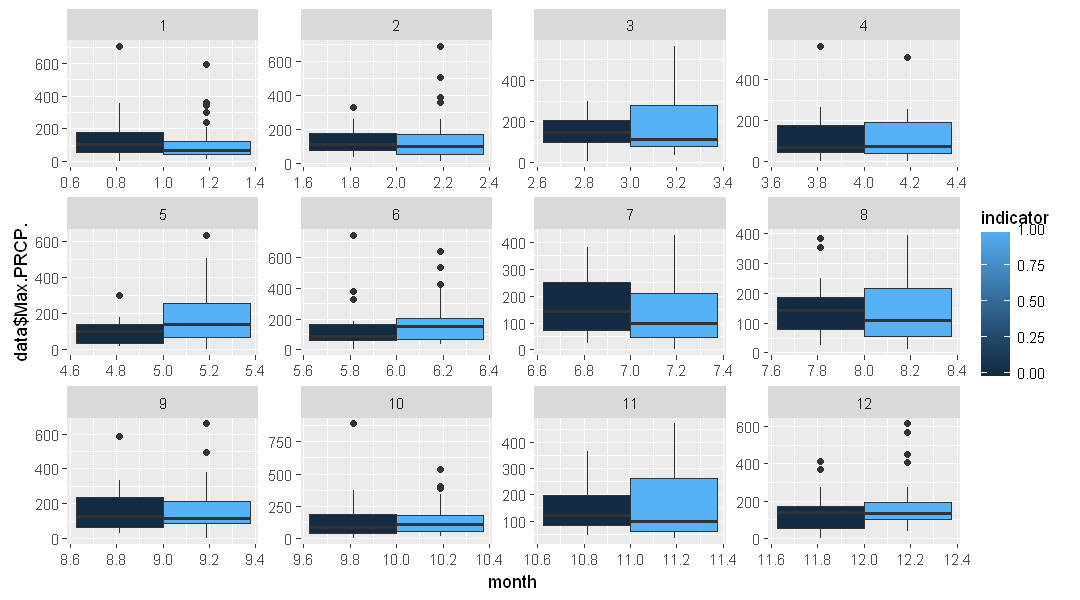

In [103]:
p <- ggplot(data = meansBoxSea, aes(x=month, y=data$Max.PRCP.)) + 
             geom_boxplot(aes(group=indicator, fill=indicator))
p + facet_wrap( ~ month, scales="free")

In [104]:
monthly = NULL
for(i in 1:12){
    monthly = cbind(monthly,data[which(data$MONTH==i),"Max.PRCP."])
}
monthlyDF = as.data.frame(monthly)
monthNames = c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec")
colnames(monthlyDF) = monthNames

In [105]:
require(ggplot2)

In [106]:
x = seq(1:nrow(data))

In [107]:
smoothJan = ts(monthlyDF$jan,start=1898)
smoothFeb = ts(monthlyDF$feb,start=1898)
smoothMar = ts(monthlyDF$mar,start=1898)
smoothApr = ts(monthlyDF$apr,start=1898)

smoothMay = ts(monthlyDF$may,start=1898)
smoothJune = ts(monthlyDF$june,start=1898)
smoothJuly = ts(monthlyDF$july,start=1898)
smoothAug = ts(monthlyDF$aug,start=1898)

smoothSept = ts(monthlyDF$sept,start=1898)
smoothOct = ts(monthlyDF$oct,start=1898)
smoothNov = ts(monthlyDF$nov,start=1898)
smoothDec = ts(monthlyDF$dec,start=1898)

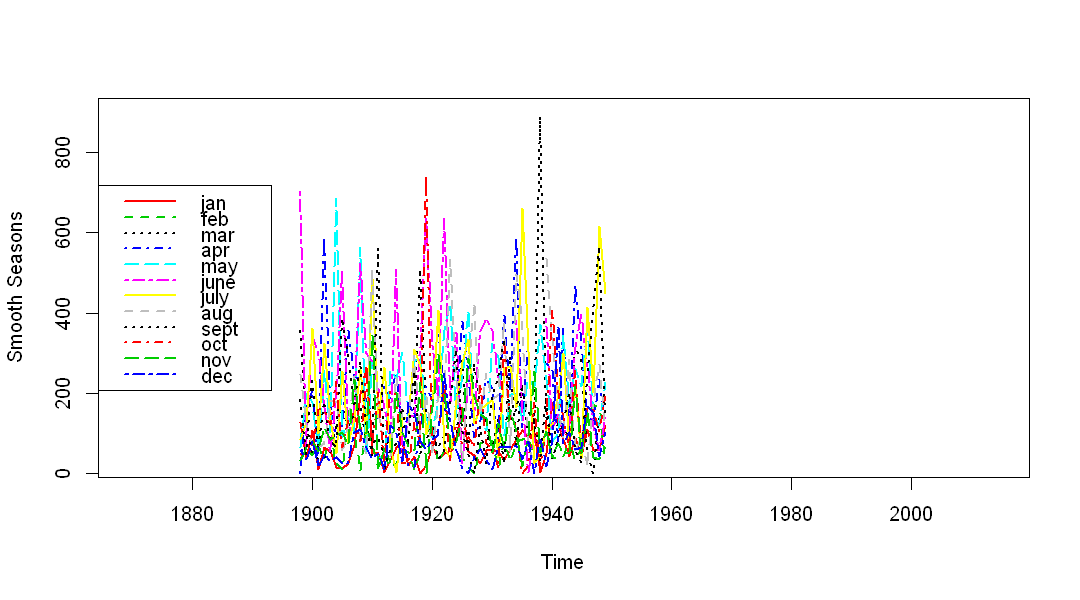

In [108]:
plot(smoothJan,col=2,ylim=c(25,900),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=2)
lines(smoothMar, lwd=2, lty=3)
lines(smoothApr,col=4, lwd=2, lty=4)

lines(smoothMay,col=5, lwd=2, lty=5)
lines(smoothJune,col=6, lwd=2, lty=6)
lines(smoothJuly,col=7, lwd=2, lty=7)
lines(smoothAug,col=8, lwd=2, lty=8)

lines(smoothSept,col=9, lwd=2, lty=9)
lines(smoothOct,col=10, lwd=2, lty=10)
lines(smoothNov,col=11, lwd=2, lty=11)
lines(smoothDec,col=12, lwd=2, lty=12)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,2,3,4,5,6,7,8,9,10,11,12),inset=c(0,0),
      lwd=c(rep(2,12)))

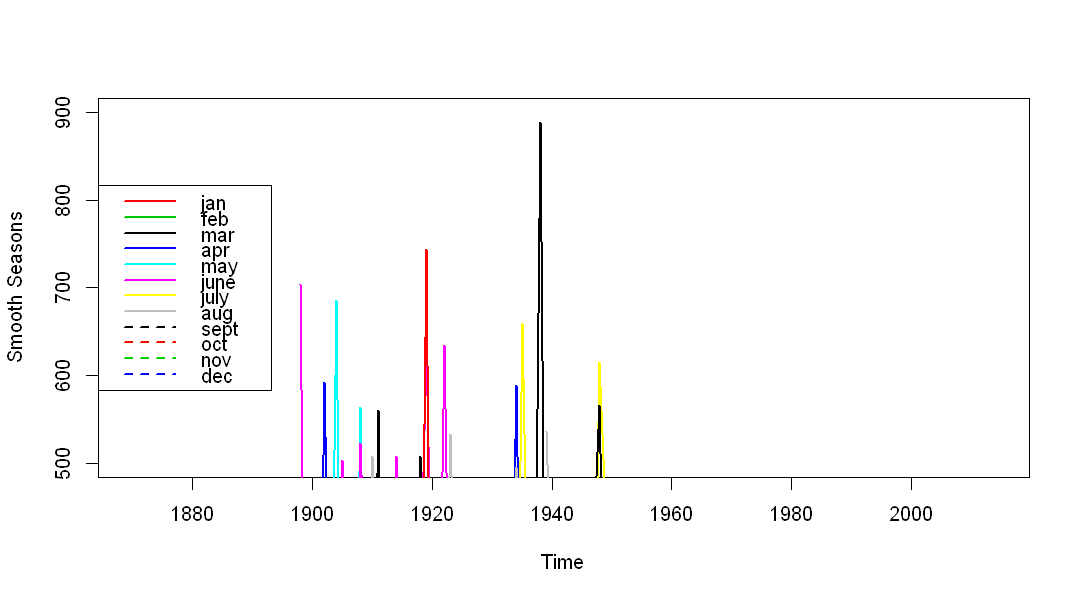

In [109]:
plot(smoothJan,col=2,ylim=c(500,900),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=1)
lines(smoothMar, lwd=2, lty=1)
lines(smoothApr,col=4, lwd=2, lty=1)

lines(smoothMay,col=5, lwd=2, lty=1)
lines(smoothJune,col=6, lwd=2, lty=1)
lines(smoothJuly,col=7, lwd=2, lty=1)
lines(smoothAug,col=8, lwd=2, lty=1)

lines(smoothSept,col=9, lwd=2, lty=1)
lines(smoothOct,col=10, lwd=2, lty=1)
lines(smoothNov,col=11, lwd=2, lty=1)
lines(smoothDec,col=12, lwd=2, lty=1)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=(c(rep(1,8),2,2,2,2)),inset=c(0,0),
      lwd=c(rep(2,12)))

In [110]:
smoothJan = ts(runmean(monthlyDF$jan,10),start=1898)
smoothFeb = ts(runmean(monthlyDF$feb,10),start=1898)
smoothMar = ts(runmean(monthlyDF$mar,10),start=1898)
smoothApr = ts(runmean(monthlyDF$apr,10),start=1898)

smoothMay = ts(runmean(monthlyDF$may,10),start=1898)
smoothJune = ts(runmean(monthlyDF$june,10),start=1898)
smoothJuly = ts(runmean(monthlyDF$july,10),start=1898)
smoothAug = ts(runmean(monthlyDF$aug,10),start=1898)

smoothSept = ts(runmean(monthlyDF$sept,10),start=1898)
smoothOct = ts(runmean(monthlyDF$oct,10),start=1898)
smoothNov = ts(runmean(monthlyDF$nov,10),start=1898)
smoothDec = ts(runmean(monthlyDF$dec,10),start=1898)

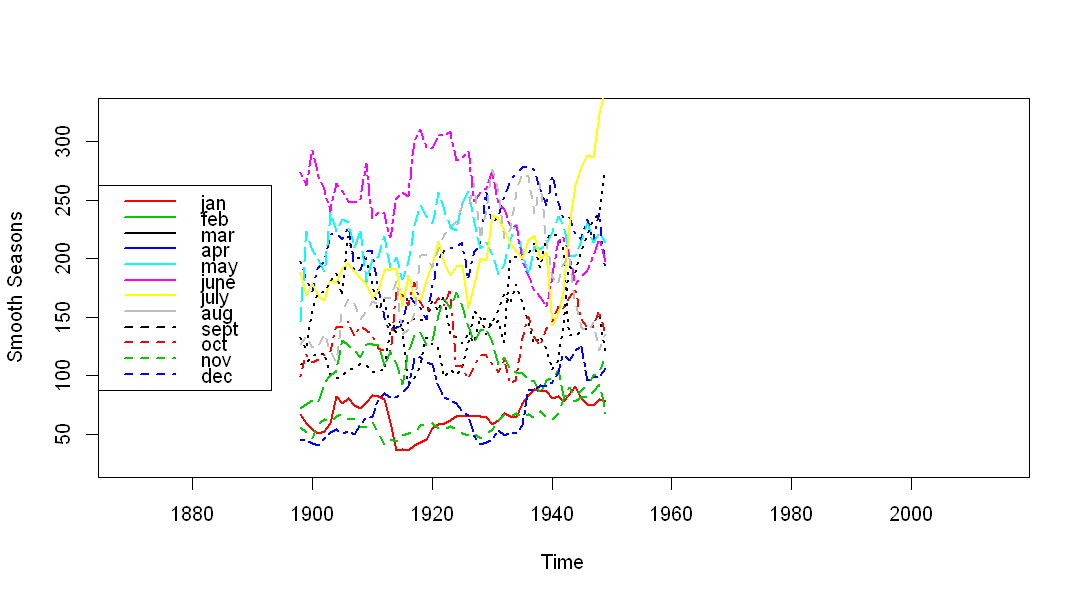

In [111]:
plot(smoothJan,col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=2)
lines(smoothMar, lwd=2, lty=3)
lines(smoothApr,col=4, lwd=2, lty=4)

lines(smoothMay,col=5, lwd=2, lty=5)
lines(smoothJune,col=6, lwd=2, lty=6)
lines(smoothJuly,col=7, lwd=2, lty=7)
lines(smoothAug,col=8, lwd=2, lty=8)

lines(smoothSept,col=9, lwd=2, lty=9)
lines(smoothOct,col=10, lwd=2, lty=10)
lines(smoothNov,col=11, lwd=2, lty=11)
lines(smoothDec,col=12, lwd=2, lty=12)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)))

In [112]:
smoothJan40 = ts(runmean(monthlyDF$jan,40),start=1898)
smoothFeb40 = ts(runmean(monthlyDF$feb,40),start=1898)
smoothMar40 = ts(runmean(monthlyDF$mar,40),start=1898)
smoothApr40 = ts(runmean(monthlyDF$apr,40),start=1898)

smoothMay40 = ts(runmean(monthlyDF$may,40),start=1898)
smoothJune40 = ts(runmean(monthlyDF$june,40),start=1898)
smoothJuly40 = ts(runmean(monthlyDF$july,40),start=1898)
smoothAug40 = ts(runmean(monthlyDF$aug,40),start=1898)

smoothSept40 = ts(runmean(monthlyDF$sept,40),start=1898)
smoothOct40 = ts(runmean(monthlyDF$oct,40),start=1898)
smoothNov40 = ts(runmean(monthlyDF$nov,40),start=1898)
smoothDec40 = ts(runmean(monthlyDF$dec,40),start=1898)

In [113]:
options(repr.plot.width=7, repr.plot.height=6) #reduces the plot sizes

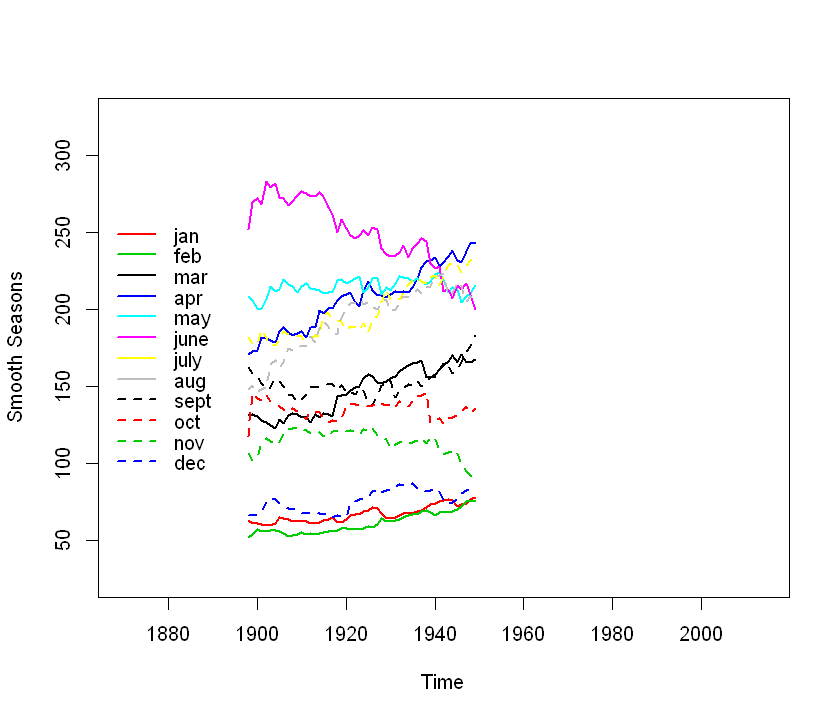

In [114]:
plot(smoothJan40,col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb40,col=3, lwd=2, lty=1)
lines(smoothMar40, lwd=2, lty=1)
lines(smoothApr40,col=4, lwd=2, lty=1)

lines(smoothMay40,col=5, lwd=2, lty=1)
lines(smoothJune40,col=6, lwd=2, lty=1)
lines(smoothJuly40,col=7, lwd=2, lty=2)
lines(smoothAug40,col=8, lwd=2, lty=2)

lines(smoothSept40,col=9, lwd=2, lty=2)
lines(smoothOct40,col=10, lwd=2, lty=2)
lines(smoothNov40,col=11, lwd=2, lty=2)
lines(smoothDec40,col=12, lwd=2, lty=2)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)), bty="n")

In [115]:
options(repr.plot.width=8, repr.plot.height=20) #reduces the plot sizes

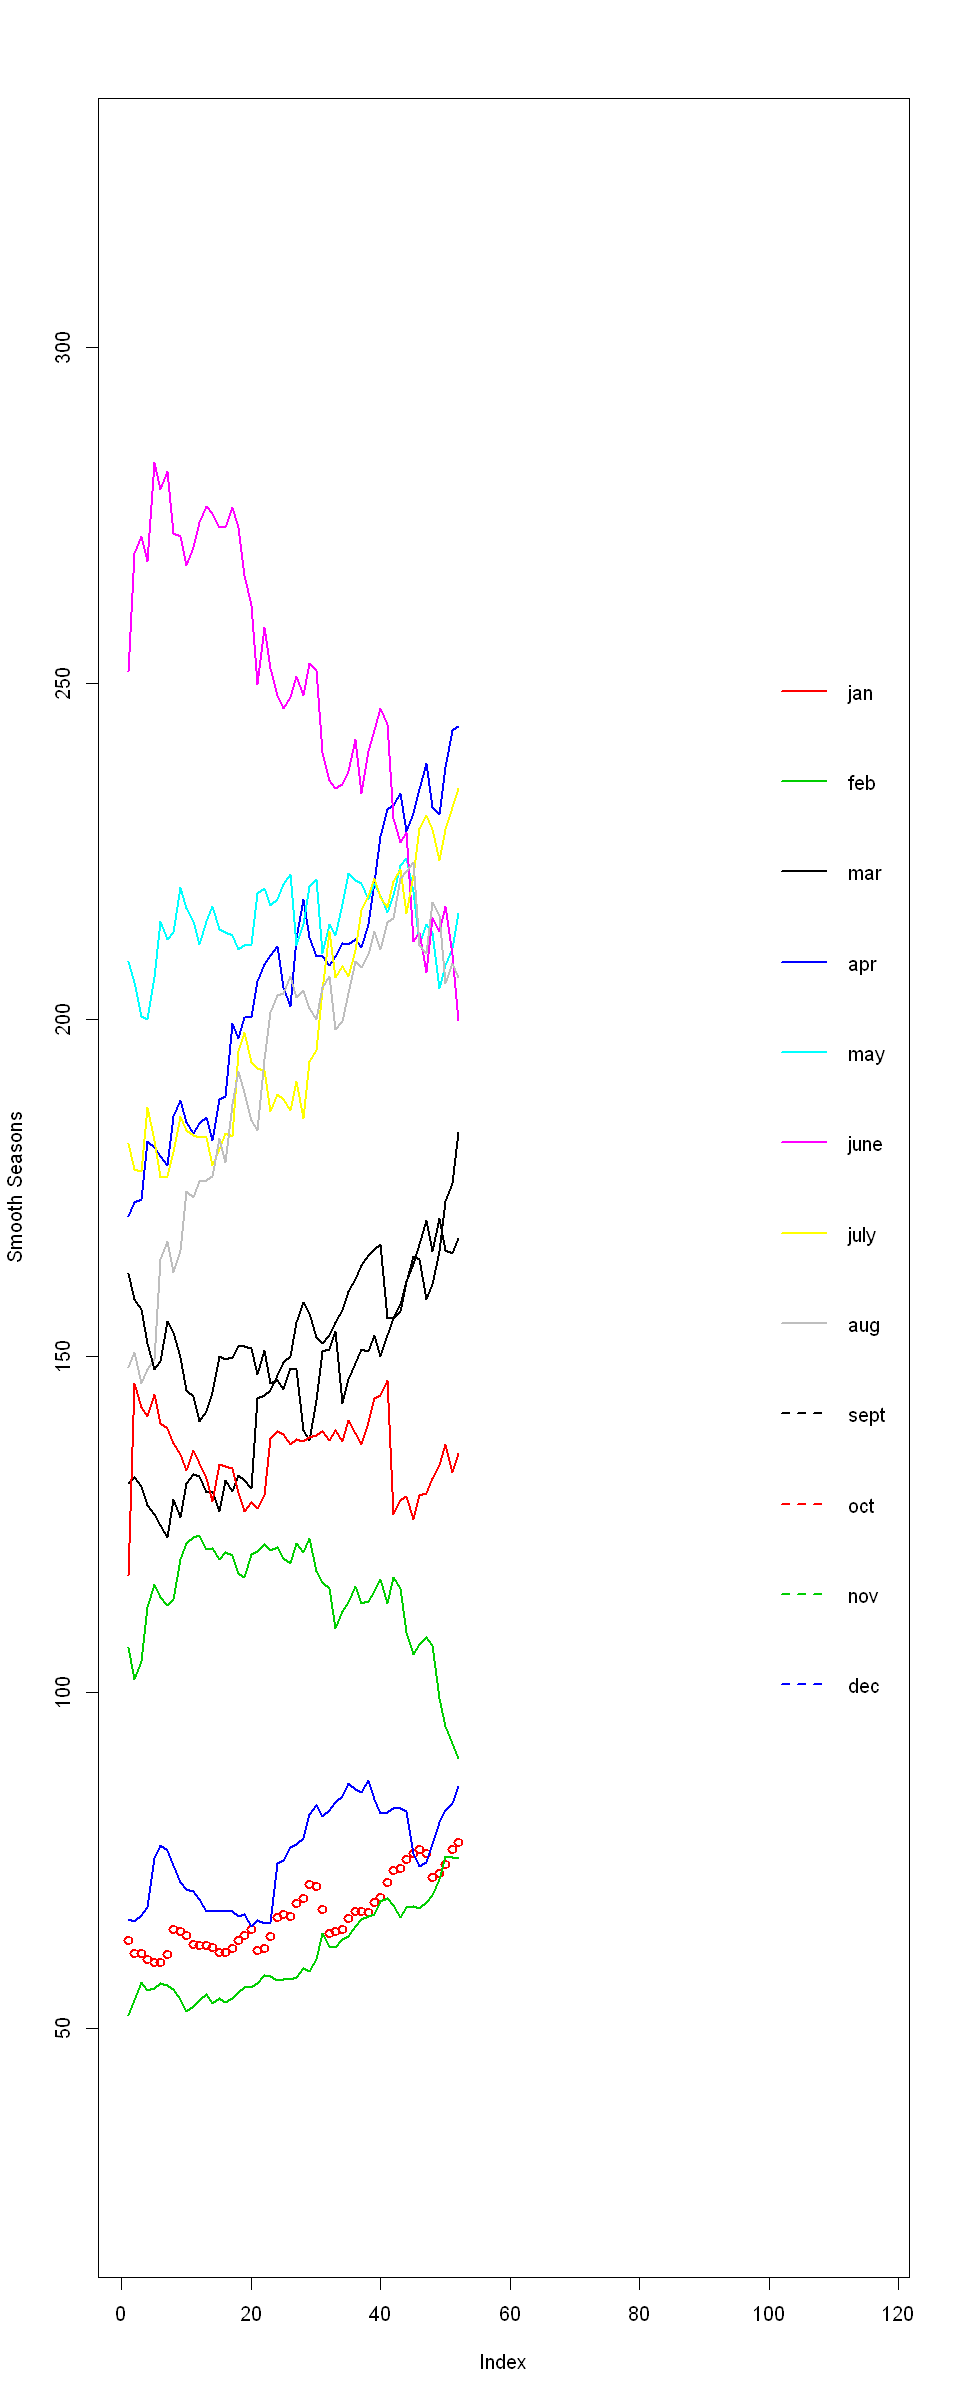

In [116]:
plot(smoothJan40[1:83],col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1, xlim=c(1,117))
lines(smoothFeb40[1:83],col=3, lwd=2, lty=1)
lines(smoothMar40[1:83], lwd=2, lty=1)
lines(smoothApr40[1:83],col=4, lwd=2, lty=1)

lines(smoothMay40[1:83],col=5, lwd=2, lty=1)
lines(smoothJune40[1:83],col=6, lwd=2, lty=1)
lines(smoothJuly40[1:83],col=7, lwd=2, lty=1)
lines(smoothAug40[1:83],col=8, lwd=2, lty=1)

lines(smoothSept40[1:83],col=9, lwd=2, lty=1)
lines(smoothOct40[1:83],col=10, lwd=2, lty=1)
lines(smoothNov40[1:83],col=11, lwd=2, lty=1)
lines(smoothDec40[1:83],col=12, lwd=2, lty=1)

lines(smoothJan40[84:117],col=2,lwd=2, lty=2)
lines(smoothFeb40[84:117],col=3, lwd=2, lty=2)
lines(smoothMar40[84:117], lwd=2, lty=2)
lines(smoothApr40[84:117],col=4, lwd=2, lty=2)

lines(smoothMay40[84:117],col=5, lwd=2, lty=2)
lines(smoothJune40[84:117],col=6, lwd=2, lty=2)
lines(smoothJuly40[84:117],col=7, lwd=2, lty=2)
lines(smoothAug40[84:117],col=8, lwd=2, lty=2)

lines(smoothSept40[84:117],col=9, lwd=2, lty=2)
lines(smoothOct40[84:117],col=10, lwd=2, lty=2)
lines(smoothNov40[84:117],col=11, lwd=2, lty=2)
lines(smoothDec40[84:117],col=12, lwd=2, lty=2)

legend("right",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)), bty="n")

In [117]:
tester = NULL
tester = c(smoothJan40,smoothFeb40,smoothMar40,smoothApr40,smoothMay40,smoothJune40,smoothJuly40,smoothAug40,
           smoothSept40,smoothOct40,smoothNov40,smoothDec40)

In [118]:
monthsTest = NULL
for(i in 1:12){
    monthsTest = c(monthsTest,rep(i,119))
}

In [119]:
monthsTest2 = NULL
for(month in monthNames){
    monthsTest2 = c(monthsTest2,rep(month,119))
}

In [120]:
counter = NULL
for(i in 1:12){
    counter = c(counter,rep(0,83),rep(1,(119-83)))
}

In [121]:
counter2 = NULL
for(i in 1:12){
    counter2 = c(counter2,rep("BeforeCP",83),rep("PostCP",(119-83)))
}

In [122]:
2014-116

[1] 1898

In [123]:
boxPlotForMonthsData = as.data.frame(cbind(tester,monthsTest,counter))

Warning message:
In cbind(tester, monthsTest, counter): number of rows of result is not a multiple of vector length (arg 1)

In [124]:
names(boxPlotForMonthsData) = c("smoothPrecip","months","counter")

In [125]:
head(boxPlotForMonthsData)

smoothPrecip,months,counter
63.09524,1,0
61.13636,1,0
61.26087,1,0
60.29167,1,0
59.92000,1,0
59.84615,1,0


In [126]:
options(repr.plot.width=9, repr.plot.height=7) #reduces the plot sizes

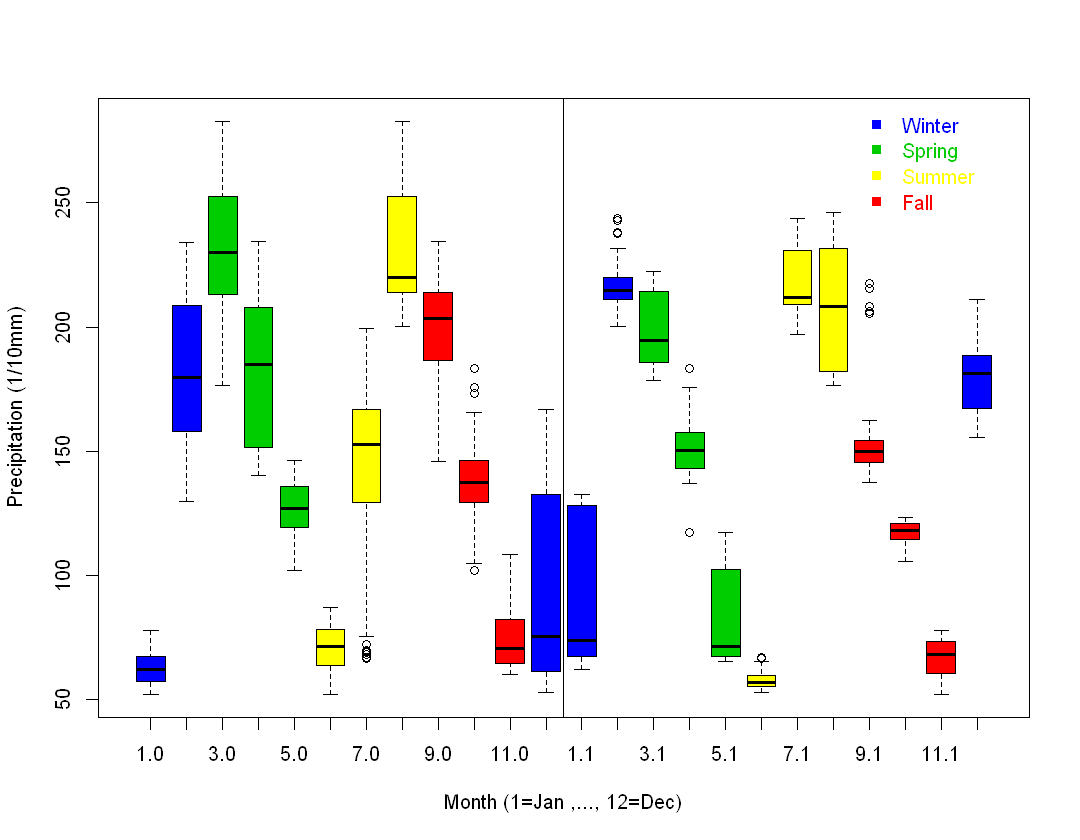

In [127]:
boxplot(boxPlotForMonthsData$smoothPrecip ~ boxPlotForMonthsData$months + boxPlotForMonthsData$counter, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,3,3,3,7,7,7,2,2,2,4), ylab = "Precipitation (1/10mm)", 
        #xaxt="n"
       )
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)
abline(v=12.5)

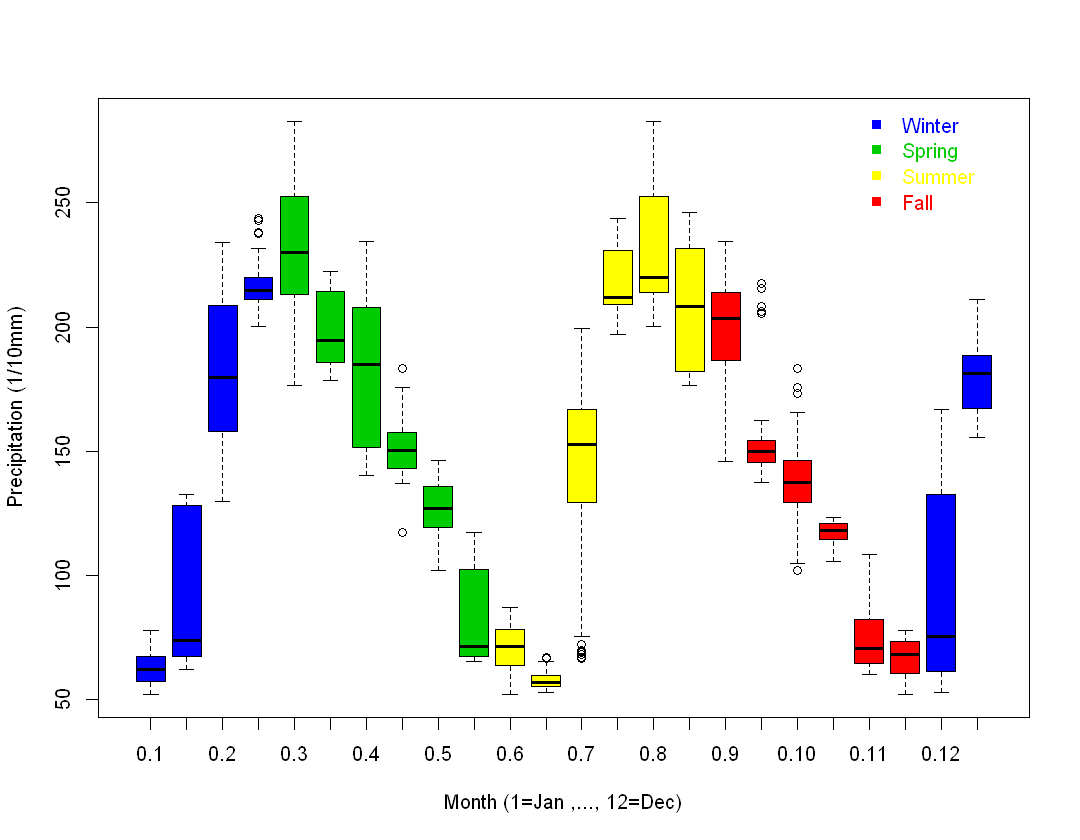

In [128]:
boxplot(boxPlotForMonthsData$smoothPrecip ~  boxPlotForMonthsData$counter+ boxPlotForMonthsData$months, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,4,4,3,3,3,3,3,3,7,7,7,7,7,7,2,2,2,2,2,2,4,4), ylab = "Precipitation (1/10mm)")
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)

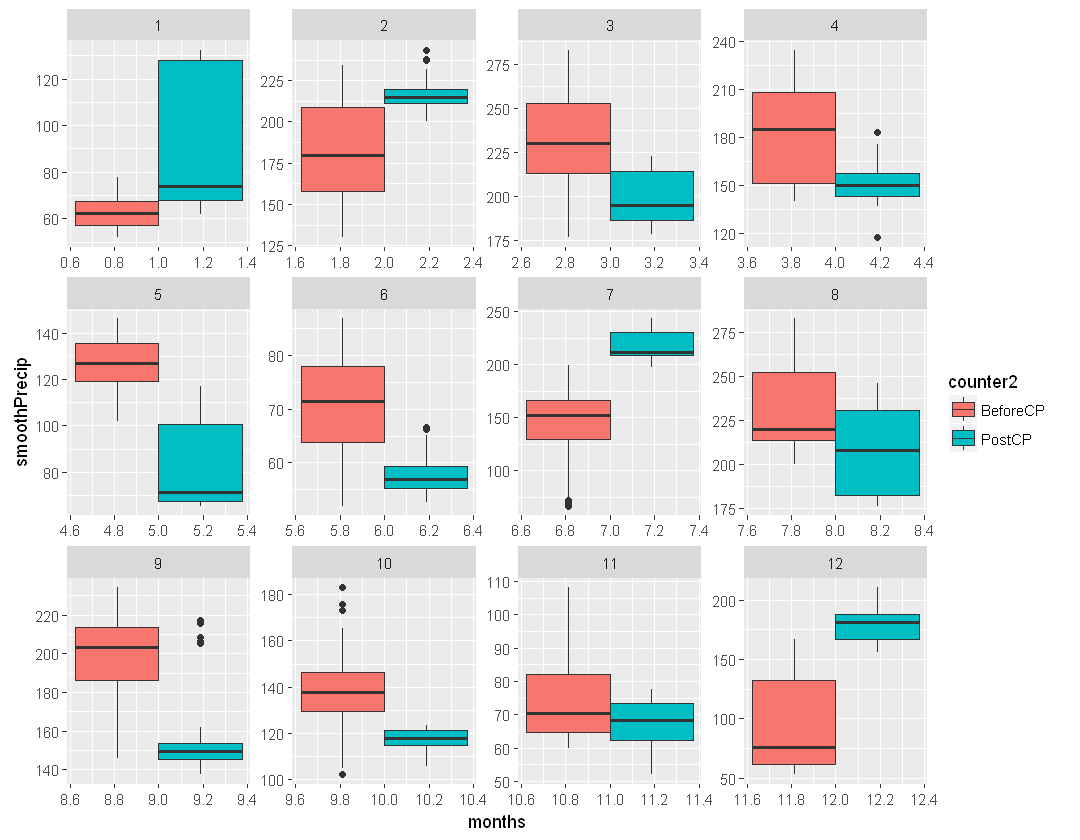

In [129]:
p <- ggplot(data = boxPlotForMonthsData, aes(x=months, y=smoothPrecip)) + 
             geom_boxplot(aes(group=counter2, fill=counter2))
p + facet_wrap( ~ months, scales="free")

In [130]:
options(repr.plot.width=6, repr.plot.height=4) #reduces the plot sizes

In [131]:
smoothJan = ts(monthlyDF$jan,start=1898)
smoothFeb = ts(monthlyDF$feb,start=1898)
smoothMar = ts(monthlyDF$mar,start=1898)
smoothApr = ts(monthlyDF$apr,start=1898)

smoothMay = ts(monthlyDF$may,start=1898)
smoothJune = ts(monthlyDF$june,start=1898)
smoothJuly = ts(monthlyDF$july,start=1898)
smoothAug = ts(monthlyDF$aug,start=1898)

smoothSept = ts(monthlyDF$sept,start=1898)
smoothOct = ts(monthlyDF$oct,start=1898)
smoothNov = ts(monthlyDF$nov,start=1898)
smoothDec = ts(monthlyDF$dec,start=1898)

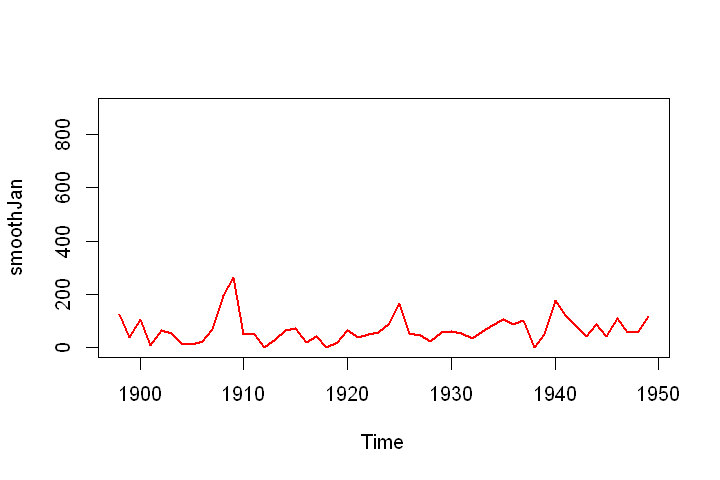

In [132]:
plot(smoothJan, ylim=c(0,900), lwd=2, lty=1, col=2)

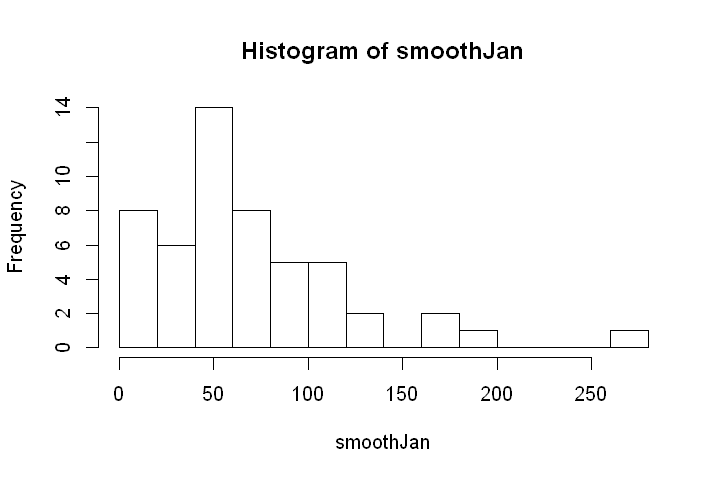

In [133]:
hist(smoothJan,breaks=10)

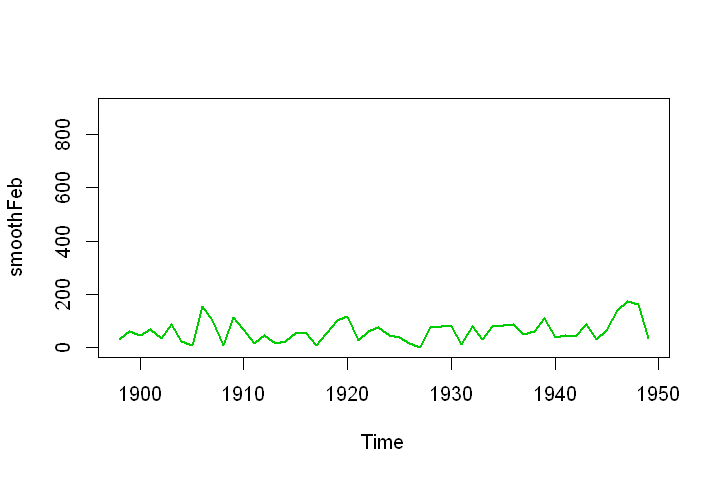

In [134]:
plot(smoothFeb, ylim=c(0,900), lwd=2, lty=1, col=3)

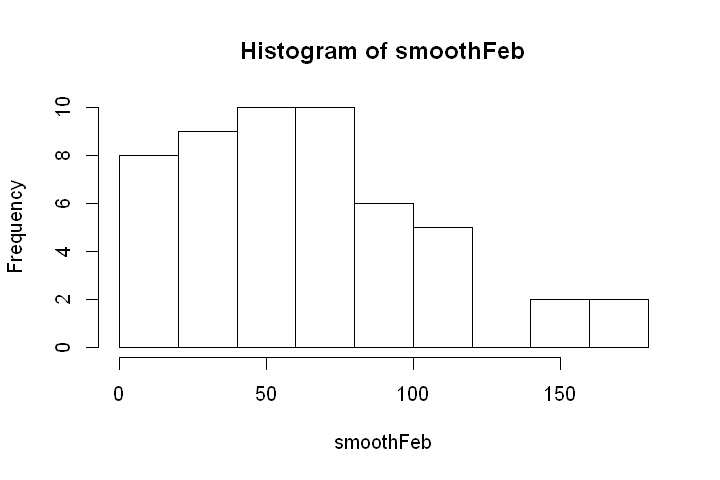

In [135]:
hist(smoothFeb,breaks=10)

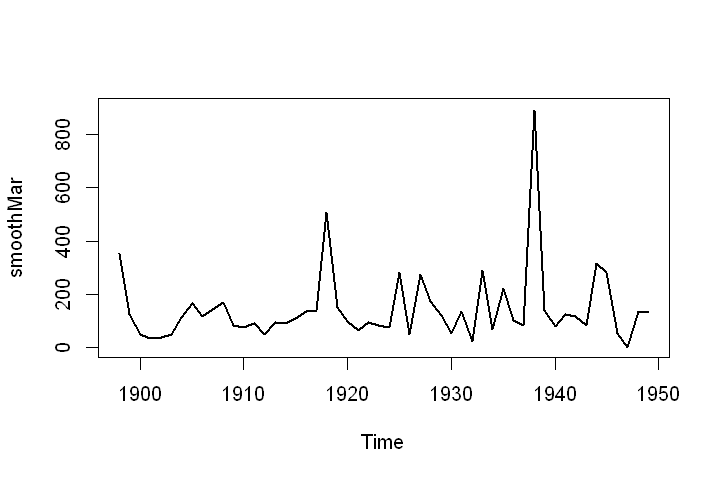

In [136]:
plot(smoothMar, ylim=c(0,900), lwd=2, lty=1, col=1)

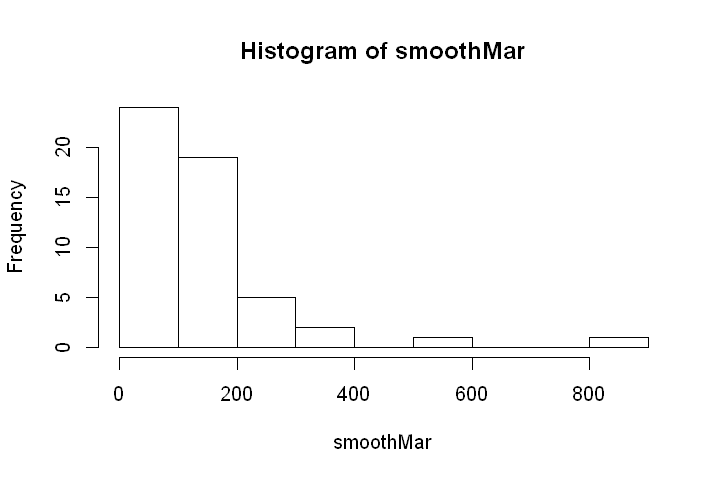

In [137]:
hist(smoothMar,breaks=10)

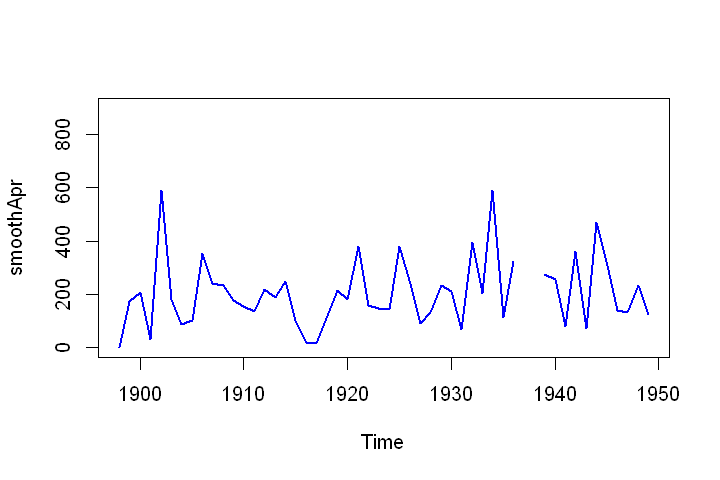

In [138]:
plot(smoothApr, ylim=c(0,900), lwd=2, lty=1, col=4)

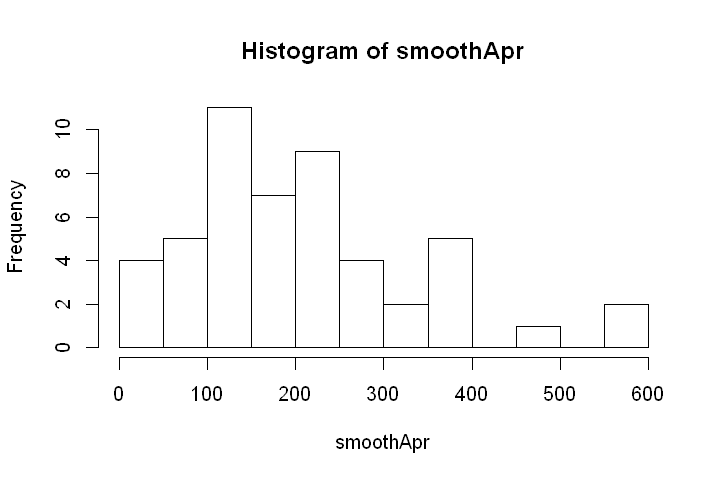

In [139]:
hist(smoothApr,breaks=10)

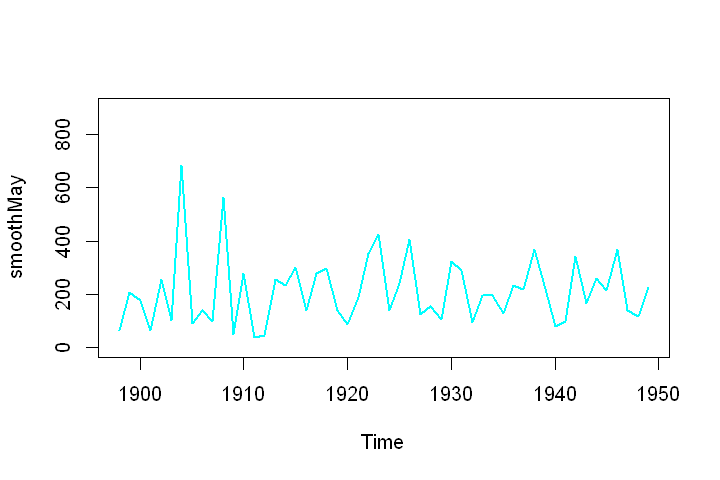

In [140]:
plot(smoothMay, ylim=c(0,900), lwd=2, lty=1, col=5)

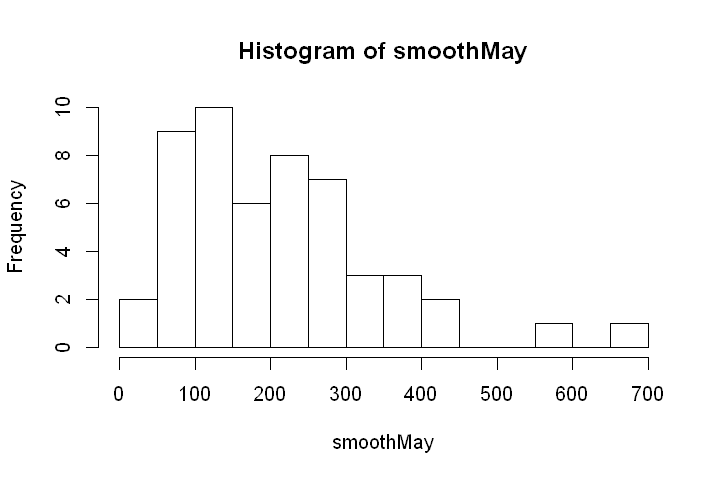

In [141]:
hist(smoothMay,breaks=10)

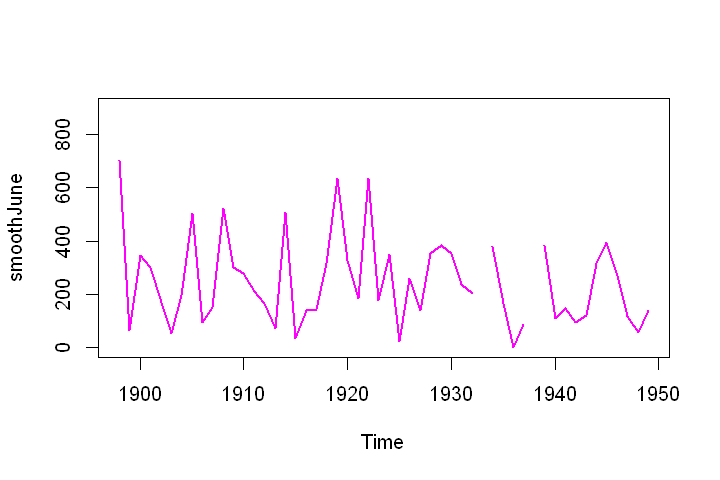

In [142]:
plot(smoothJune, ylim=c(0,900), lwd=2, lty=1, col=6)

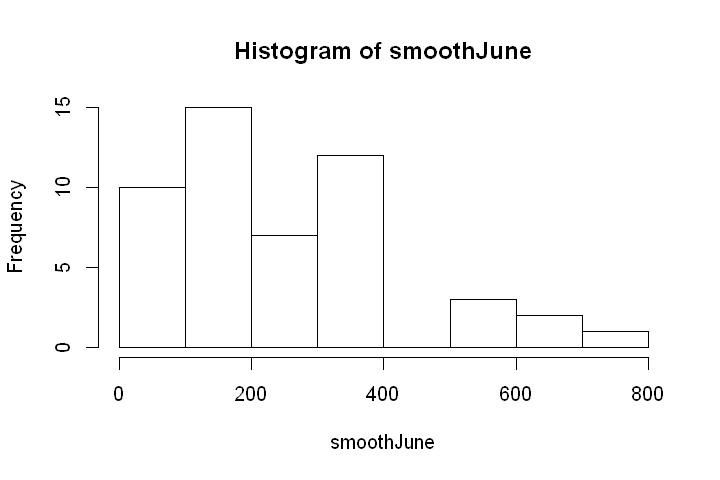

In [143]:
hist(smoothJune,breaks=10)

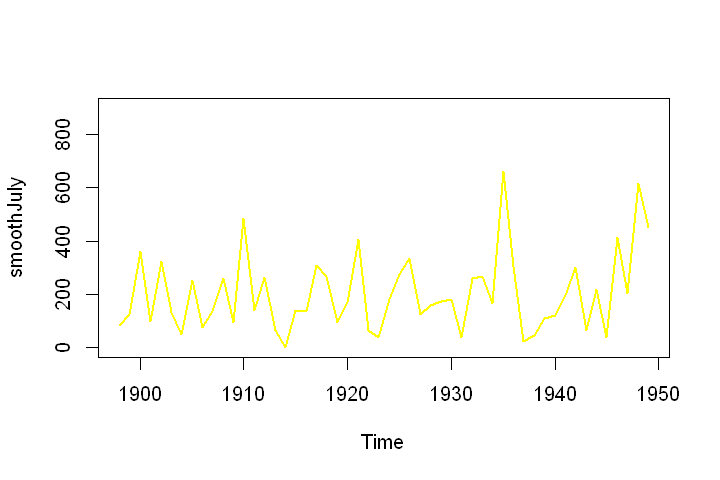

In [144]:
plot(smoothJuly, ylim=c(0,900), lwd=2, lty=1, col=7)

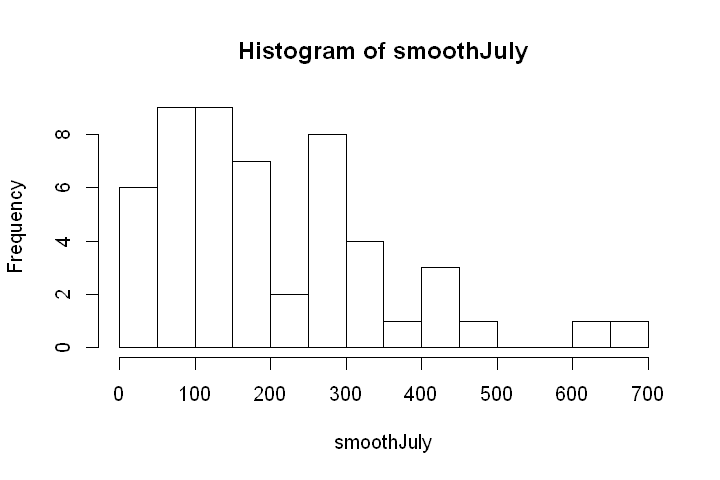

In [145]:
hist(smoothJuly,breaks=10)

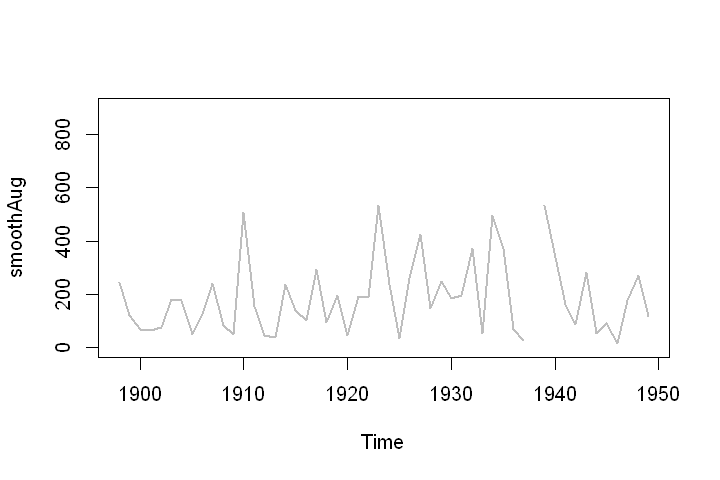

In [146]:
plot(smoothAug, ylim=c(0,900), lwd=2, lty=1, col=8)

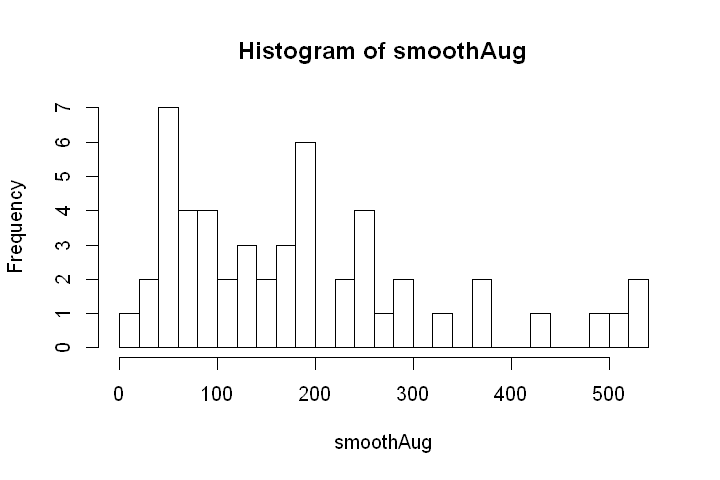

In [147]:
hist(smoothAug,breaks=20)

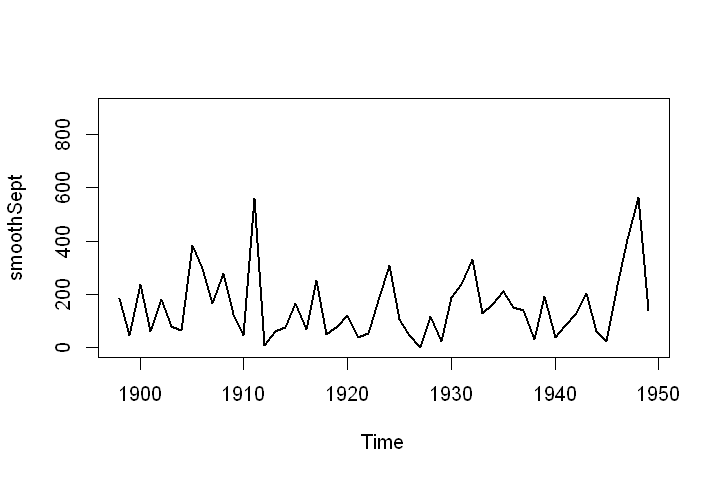

In [148]:
plot(smoothSept, ylim=c(0,900), lwd=2, lty=1, col=9)

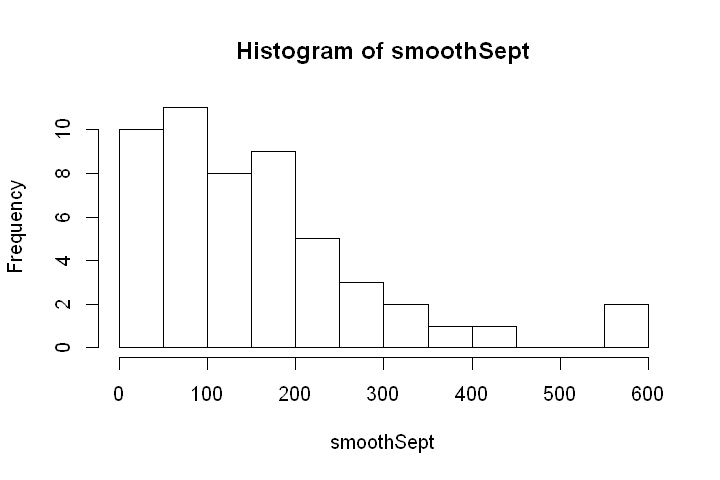

In [149]:
hist(smoothSept,breaks=10)

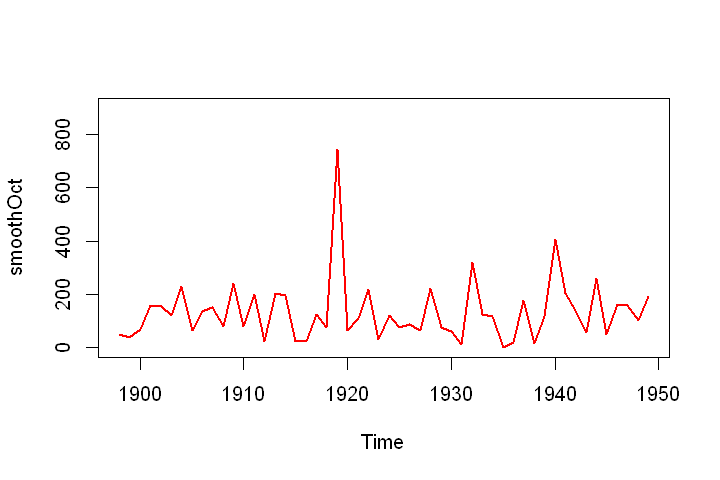

In [150]:
plot(smoothOct, ylim=c(0,900), lwd=2, lty=1, col=10)

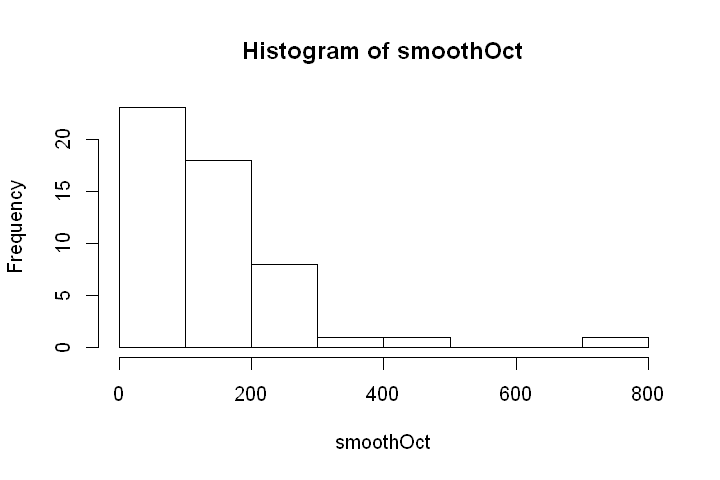

In [151]:
hist(smoothOct,breaks=10)

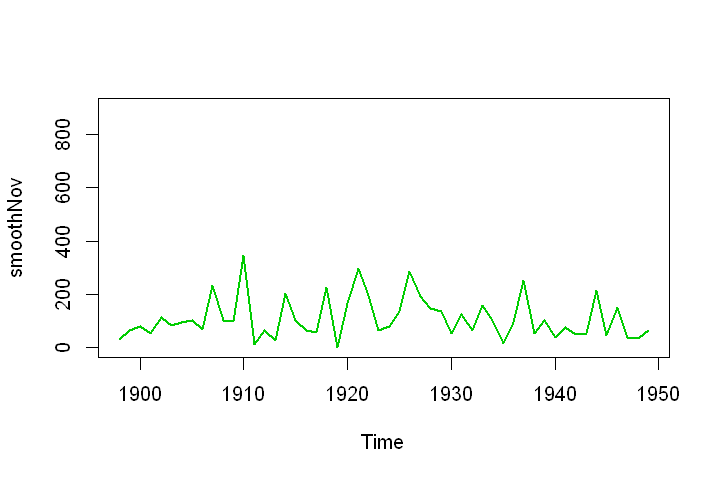

In [152]:
plot(smoothNov, ylim=c(0,900), lwd=2, lty=1, col=11)

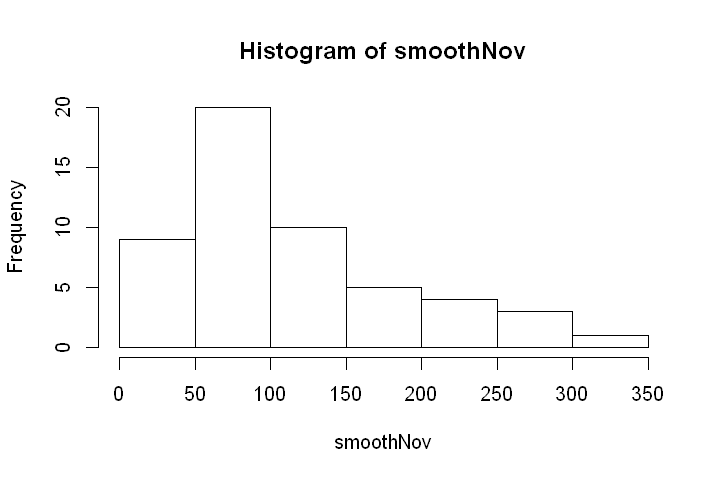

In [153]:
hist(smoothNov,breaks=10)

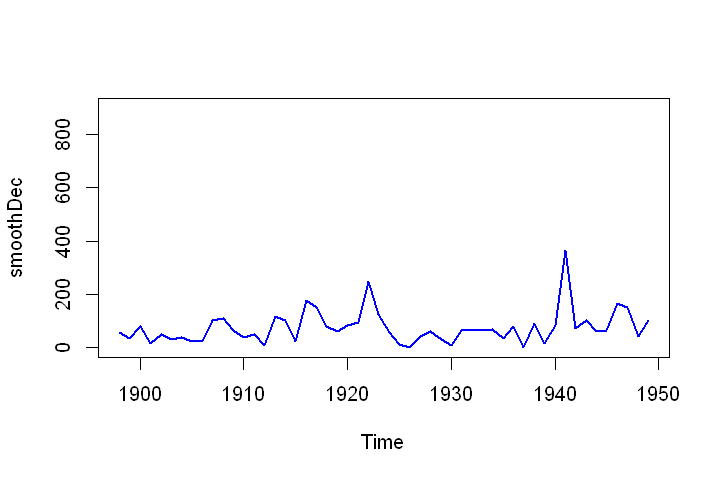

In [154]:
plot(smoothDec, ylim=c(0,900), lwd=2, lty=1, col=12)

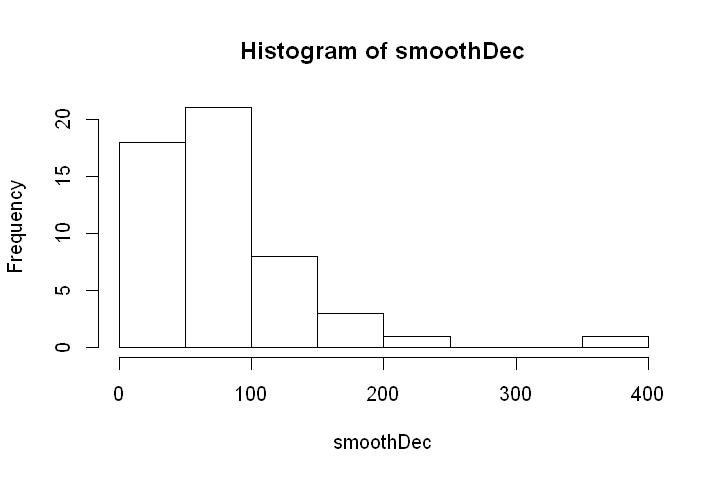

In [155]:
hist(smoothDec,breaks=10)

Flood tolerance, probabilities from selected distributions, bayesian updated (last add)